In [1]:
# MeanMachineRex prefers orange cats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pyproj

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# For transforming lon/lat coordinates to x/y coordinate in feet suitable for Illinois
# https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset
# EPSG:4326 - https://epsg.io/4326
# EPSG:32118 - https://epsg.io/32118
transformer_ll_to_xy = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:32118', always_xy=True)

In [3]:
# https://data.cityofnewyork.us/browse?sortBy=most_accessed&utf8=%E2%9C%93&Data-Collection_Data-Collection=Forestry+Management+System+%28ForMS%29&pageSize=20&page=1
df_tree_points = pd.read_csv('./data/Forestry_Management_System/Forestry_Tree_Points_20250830.csv')
print('Records:', len(df_tree_points))
print('Columns:', list(df_tree_points.columns))
df_tree_points[:1]

Records: 1089815
Columns: ['OBJECTID', 'DBH', 'TPStructure', 'TPCondition', 'StumpDiameter', 'PlantingSpaceGlobalID', 'Geometry', 'GlobalID', 'GenusSpecies', 'CreatedDate', 'UpdatedDate', 'PlantedDate', 'RiskRating', 'RiskRatingDate', 'Location']


,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
0,11488530,6.0,Full,Fair,NaN,D86F65D3-53B3-4B3D-A7C0-FC18778ACBDA,POINT(-73.77075300216298 40.74800144086034),2197AE85-1F5C-4EC5-8983-1C3AE158E282,Crataegus - Hawthorn,2021-04-20 19:00:57.0000000,NaN,NaN,NaN,NaN,POINT (-73.77075300216298 40.74800144086034)


In [4]:
# https://data.cityofnewyork.us/browse?sortBy=most_accessed&utf8=%E2%9C%93&Data-Collection_Data-Collection=Forestry+Management+System+%28ForMS%29&pageSize=20&page=1
df_planting_spaces = pd.read_csv('./data/Forestry_Management_System/Forestry_Planting_Spaces_20250830.csv', dtype={
    'ParkZone': 'string',
    'TreeGuard': 'string',
    'NTA': 'string',
})
print('Records:', len(df_planting_spaces))
print('Columns:', list(df_planting_spaces.columns))
df_planting_spaces[:1]

Records: 1091709
Columns: ['OBJECTID', 'Borough', 'Number', 'Street', 'PSSite', 'PlantingSpaceOnStreet', 'Width', 'Length', 'ParkName', 'ParkZone', 'CrossStreet1', 'CrossStreet2', 'CommunityBoard', 'SanitationZone', 'Postcode', 'Council District', 'StateSenate', 'StateAssembly', 'Congressional', 'PhysicalID', 'PSStatus', 'Geometry', 'GlobalID', 'CreatedDate', 'UpdatedDate', 'Jurisdiction', 'OverheadUtilities', 'TreeGuard', 'Latitude', 'Longitude', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Location']


,OBJECTID,Borough,Number,Street,PSSite,PlantingSpaceOnStreet,Width,Length,ParkName,ParkZone,CrossStreet1,CrossStreet2,CommunityBoard,SanitationZone,Postcode,Council District,StateSenate,StateAssembly,Congressional,PhysicalID,PSStatus,Geometry,GlobalID,CreatedDate,UpdatedDate,Jurisdiction,OverheadUtilities,TreeGuard,Latitude,Longitude,Census Tract,BIN,BBL,NTA,Location
0,1236278,Queens,39-020,39 ROAD,Street,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empty,POINT(-73.74008473163144 40.77488119036937),41F1D043-0071-4256-BA71-7118BFA4E709,2015-10-02T18:05:00,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,POINT (-73.74008473163144 40.77488119036937)


In [15]:
location_lon_lat = df_tree_points['Location'].str.replace('POINT (', '').str.replace(')', '').str.split()
df_tree_points['Location_Longitude'] = location_lon_lat.apply(lambda l: float(l[0]))
df_tree_points['Location_Latitude'] = location_lon_lat.apply(lambda l: float(l[1]))
df_tree_points[['X', 'Y']] = df_tree_points.apply(lambda row: transformer_ll_to_xy.transform(row['Location_Longitude'], row['Location_Latitude']), axis=1, result_type='expand')
del location_lon_lat

In [6]:
df_tree_points['TPCondition'].value_counts()

TPCondition
Good         487280
Fair         300160
Dead         117391
Excellent    101824
Poor          46251
Unknown       30793
Critical       6108
Name: count, dtype: int64

In [7]:
df_tree_points_living = df_tree_points[
    (df_tree_points['TPCondition'] != 'Dead') & (df_tree_points['TPCondition'] != 'Unknown')
]
print('Records:', len(df_tree_points_living))
print('Columns:', list(df_tree_points_living.columns))
df_tree_points_living[:1]

Records: 941631
Columns: ['OBJECTID', 'DBH', 'TPStructure', 'TPCondition', 'StumpDiameter', 'PlantingSpaceGlobalID', 'Geometry', 'GlobalID', 'GenusSpecies', 'CreatedDate', 'UpdatedDate', 'PlantedDate', 'RiskRating', 'RiskRatingDate', 'Location', 'Location_Longitude', 'Location_Latitude', 'X', 'Y']


,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location,Location_Longitude,Location_Latitude,X,Y
0,11488530,6.0,Full,Fair,NaN,D86F65D3-53B3-4B3D-A7C0-FC18778ACBDA,POINT(-73.77075300216298 40.74800144086034),2197AE85-1F5C-4EC5-8983-1C3AE158E282,Crataegus - Hawthorn,2021-04-20 19:00:57.0000000,NaN,NaN,NaN,NaN,POINT (-73.77075300216298 40.74800144086034),-73.770753,40.748001,319360.921514,64580.197612


In [8]:
df_tree_points_dead = df_tree_points[
    (df_tree_points['TPCondition'] == 'Dead') | (df_tree_points['TPCondition'] == 'Unknown')
]
print('Records:', len(df_tree_points_dead))
print('Columns:', list(df_tree_points_dead.columns))
df_tree_points_dead[:1]

Records: 148184
Columns: ['OBJECTID', 'DBH', 'TPStructure', 'TPCondition', 'StumpDiameter', 'PlantingSpaceGlobalID', 'Geometry', 'GlobalID', 'GenusSpecies', 'CreatedDate', 'UpdatedDate', 'PlantedDate', 'RiskRating', 'RiskRatingDate', 'Location', 'Location_Longitude', 'Location_Latitude', 'X', 'Y']


,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location,Location_Longitude,Location_Latitude,X,Y
25,5139698,0.0,Stump,Unknown,0.0,6A70DD28-BA08-4562-A8BC-4748055045EF,POINT(-73.95096967620049 40.81345388911364),6A70DD28-BA08-4562-A8BC-4748055045EF,Unknown - Unknown,2017-12-20 11:11:11.0000000,NaN,NaN,NaN,NaN,POINT (-73.95096967620049 40.81345388911364),-73.95097,40.813454,304136.763589,71824.462535


In [9]:
df_tree_points_living['GenusSpecies'].value_counts(dropna=False)[:10]

GenusSpecies
Platanus x acerifolia - London planetree                                  103513
Gleditsia triacanthos var. inermis - Thornless honeylocust                 74217
Quercus palustris - pin oak                                                69974
Pyrus calleryana - Callery pear                                            56636
Zelkova serrata - Japanese zelkova                                         34297
Acer platanoides - Norway maple                                            31159
Tilia cordata - littleleaf linden                                          30506
Prunus serrulata 'Green leaf' - 'Green leaf' Japanese flowering cherry     25652
Ginkgo biloba - maidenhair tree                                            23776
Acer rubrum - red maple                                                    22703
Name: count, dtype: int64

In [10]:
df_tree_points_living['GenusSpecies'].value_counts(dropna=False)[-10:]

GenusSpecies
Cornus florida 'Cherokee Sunset' - 'Cherokee Sunset' Flowering dogwood    1
Parrotia persica 'Vanessa' - 'Vanessa' Persian ironwood                   1
Malus 'Dolgo' - 'Dolgo' Crabapple                                         1
Pyrus calleryana 'Silver Ball' - 'Silver Ball' Callery pear               1
Sorbus aucuparia 'Cardinal Royal' - 'Cardinal Royal' Mountain ash         1
Thuja occidentalis 'Hetz Wintergreen' - 'Hetz Wintergreen' Arborvitae     1
Styrax japonicus 'Pink Chimes' - 'Pink Chimes' Japanese snowbell          1
Prunus serrula - Tibetan cherry                                           1
Prunus domestica - Domestic Plum                                          1
Carpinus betulus 'Franz Fontaine' - 'Franz Fontaine' European hornbeam    1
Name: count, dtype: int64

In [11]:
df_planting_spaces['Borough'].value_counts(dropna=False)

Borough
Queens           371611
Brooklyn         283820
Bronx            163353
Staten Island    154047
Manhattan        118365
NaN                 513
Name: count, dtype: int64

Platanus x acerifolia - London planetree -73.99454461858741 40.621649501353176 272.0
Acer platanoides - Norway maple -74.08152204794281 40.64090286309263 252.0
Platanus x acerifolia - London planetree -73.91997911633125 40.6539150513497 244.0
Platanus x acerifolia - London planetree -74.19807662178837 40.54076417637812 234.0
Metasequoia glyptostroboides - dawn redwood -73.94817376773346 40.728017818419495 205.0
Acer platanoides - Norway maple -73.72687693417315 40.671258594619665 177.0
Acer saccharinum - silver maple -74.14787407370066 40.558334045214494 166.0
Acer saccharinum - silver maple -73.74831020511203 40.690041915822604 160.0
Acer rubrum - red maple -74.24120101621932 40.50377414967513 155.0
Pyrus calleryana - Callery pear -73.74623421754487 40.69264757756036 145.0
Platanus x acerifolia - London planetree -74.17326317771581 40.536252084548146 133.0
Gleditsia triacanthos var. inermis - Thornless honeylocust -73.88319123207279 40.68110981077644 121.0
Ulmus americana - American e

/home/kate/projects/data-trees-new-york/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


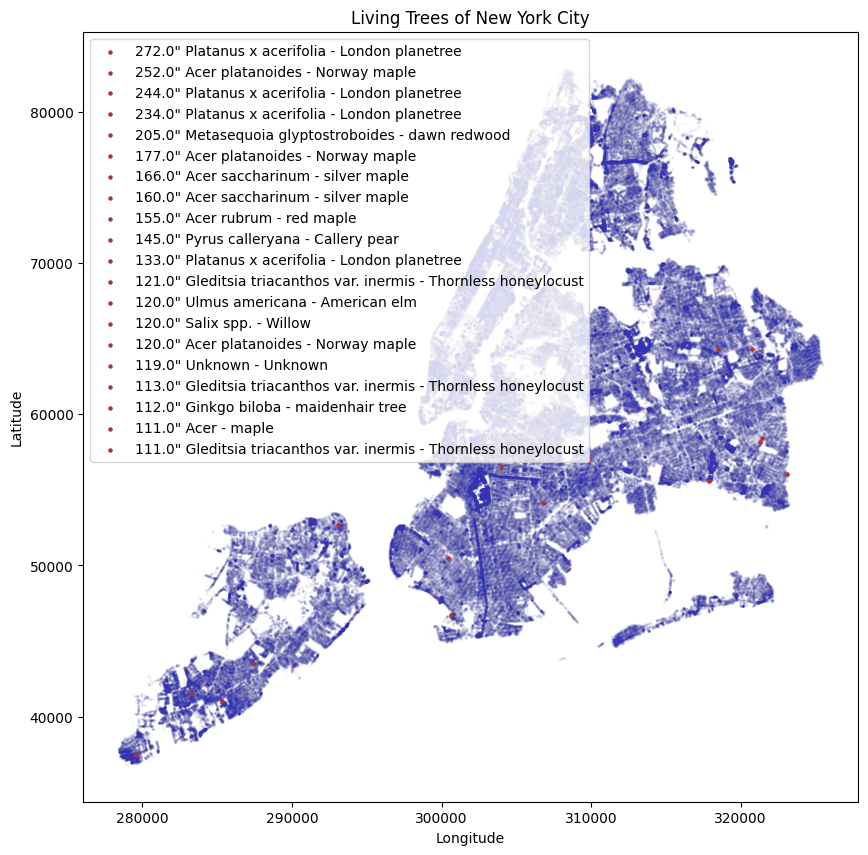

In [45]:
df = df_tree_points_living

# we filter out some very likely bad data entries...
df2 = df[
    (df['GenusSpecies'] != 'Quercus rubra - northern red oak')
    & (df['GenusSpecies'] != 'Tilia americana - American basswood')
    & (df['GenusSpecies'] != 'Quercus palustris - pin oak')
].sort_values(by='DBH', ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['X'], df['Y'], s=0.1, color=(0.2, 0.2, 0.7, 0.05))
for row in df2.iloc:
    print(row['GenusSpecies'], row['Location_Longitude'], row['Location_Latitude'], row['DBH'])
    ax.scatter(row['X'], row['Y'], s=5, color=(0.7, 0.2, 0.2, 1.0), label=str(row['DBH']) + '" ' + row['GenusSpecies'])
ax.set_title('Living Trees of New York City')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

# these all look sus, don't believe any of them. tried to find them on street view, but couldn't or they are regular sized.

# BONUS STUFF

In [13]:
df_planting_spaces[
    df_planting_spaces['Borough'] == 'Manhattan'
][['Borough', 'NTA']].value_counts(dropna=False)[:20]

Borough    NTA                                        
Manhattan  <NA>                                           54860
           Upper East Side-Carnegie Hill                   3585
           Upper West Side (Central)                       3446
           Chelsea-Hudson Yards                            3006
           East Village                                    2613
           East Harlem (North)                             2539
           Harlem (North)                                  2473
           Upper East Side-Lenox Hill-Roosevelt Island     2465
           Hell's Kitchen                                  2441
           Upper East Side-Yorkville                       2329
           /                                               2205
           Murray Hill-Kips Bay                            2118
           East Harlem (South)                             2037
           Washington Heights (South)                      1829
           Harlem (South)                        

Populus deltoides - eastern cottonwood -73.99998873921932 40.71562276697521 51.0
Platanus x acerifolia - London planetree -74.00648301353743 40.71369678172114 48.0
Ulmus pumila - Siberian elm -74.00619826231261 40.71225666954904 46.0
Ulmus americana - American elm -74.00510688523408 40.71272690427687 46.0
Ulmus americana - American elm -74.00520108768849 40.71286780926607 44.0
Ulmus americana - American elm -74.00512041248537 40.712928723148025 44.0
Ulmus americana - American elm -74.00520602701802 40.712576484029796 44.0
Platanus x acerifolia - London planetree -74.00729700656716 40.71252151527048 44.0
Acer saccharinum - silver maple -73.98230102412519 40.72416054680214 43.0
Platanus x acerifolia - London planetree -74.01449787335487 40.70231513305172 43.0
Platanus x acerifolia - London planetree -74.00687750263636 40.71324227778684 42.0
Platanus occidentalis - American sycamore -74.0148247265973 40.70406722317239 42.0
Ulmus pumila - Siberian elm -73.98894004685401 40.71522730294433 4

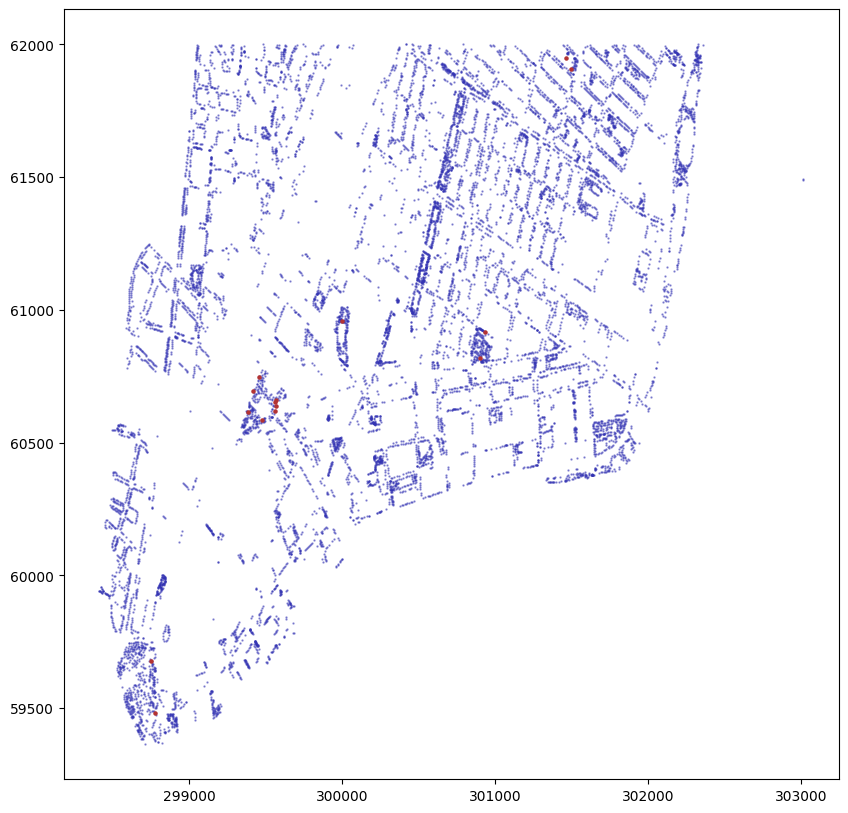

In [44]:
df = df_tree_points_living.merge(
    df_planting_spaces,
    left_on=['PlantingSpaceGlobalID'],
    right_on=['GlobalID']
)
df = df[
    df['Borough'] == 'Manhattan'
]

df = df[
    (df['Borough'] == 'Manhattan')
    &(df['Location_Longitude'] < -73.800)
    &(df['Location_Longitude'] > -74.100)
    &(df['Location_Latitude']  > 40.700)
    &(df['Location_Latitude']  < 40.725)
]

df3 = df.sort_values(by='DBH', ascending=False)[:15]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['X'], df['Y'], s=0.5, color=(0.2, 0.2, 0.7, 0.5))
for row in df3.iloc:
    print(row['GenusSpecies'], row['Location_Longitude'], row['Location_Latitude'], row['DBH'])
    ax.scatter(row['X'], row['Y'], s=5, color=(0.7, 0.2, 0.2, 1.0), label=str(row['DBH']) + '" ' + row['GenusSpecies'])
plt.show()